In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [2]:
df=pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.shape

(400, 4)

In [5]:
df.columns = ["admit","gre","gpa","prestige"]
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
pd.crosstab(df['admit'],df['prestige'],rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


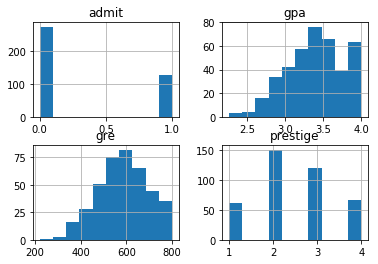

In [8]:
df.hist()
pl.show()

In [9]:
dummy_rank = pd.get_dummies(df['prestige'],prefix='prestige')
dummy_rank.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [10]:
cols_to_keep = ['admit','gre','gpa']
data = df[cols_to_keep].join(dummy_rank.ix[:,'prestige_2':])
data.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [11]:
#adding the intercept manually
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [13]:
train_cols = data.columns[1:]
Logit = sm.Logit(data["admit"],data[train_cols])

In [17]:
results = Logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [23]:
ironman = results.predict([800,4,0,0,0,1.0])

In [24]:
print(ironman)

[0.73840825]


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                 0.08292
Time:                        14:26:59   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""